In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import copy 

In [3]:
data = loadmat("prob3data1.mat")

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

[2]


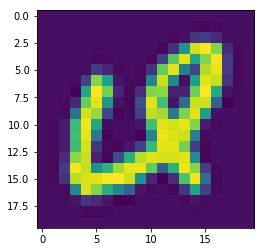

In [5]:
X = data['X']
y = data['y']
number = np.reshape(X[1234,:], (20, 20))
plt.imshow(number)
print(y[1234])

In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [7]:
sigmoid(0)

0.5

In [8]:
sigmoid(1)

0.7310585786300049

In [9]:
#theta = np.matrix(np.zeros((1,401)))

In [10]:
#theta

In [11]:
def cost(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [12]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [13]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [14]:
np.sum(y)

27500

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
#X = np.matrix(X)
#y = np.matrix(y)

In [17]:
X.shape

(5000, 400)

In [18]:
y.shape

(5000, 1)

In [19]:
#X = np.insert(X,0,1,axis=1)

In [20]:
#X

In [21]:
#cost(theta,X,y)

In [22]:
def gradient(theta, X, y):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = (np.sum(term) / len(X))

    return grad

In [23]:
from scipy.optimize import minimize

In [24]:
def final_theta_computation(X, y):  
    rows = X.shape[0]
    params = X.shape[1]
    num_labels = 10
    # k X (n + 1) array for the parameters of each of the k classifiers
    all_theta = np.zeros((num_labels, params + 1))

    # insert a column of ones at the beginning for the intercept term
    X = np.insert(X, 0, values=np.ones(rows), axis=1)

    # labels are 1-indexed instead of 0-indexed
    for i in range(1, num_labels + 1):
        theta = np.zeros(params + 1)
        y_i = np.array([1 if label == i else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))

        # minimize the objective function
        fmin = minimize(fun=cost, x0=theta, args=(X, y_i), method='TNC', jac=gradient)
        all_theta[i-1,:] = fmin.x

    return all_theta

In [25]:
y.shape

(5000, 1)

In [26]:
a = final_theta_computation(X,y)

C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Anaconda\envs\rstudio\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [27]:
a.shape

(10, 401)

In [28]:
type(a)

numpy.ndarray

In [29]:
a

array([[-4.86087706e+00,  0.00000000e+00,  0.00000000e+00, ...,
         9.09880173e-03,  2.88128121e-07,  0.00000000e+00],
       [-5.68297203e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.68895648e-02, -6.27323622e-03,  0.00000000e+00],
       [-8.75563138e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.70331373e-04, -1.20151543e-06,  0.00000000e+00],
       ...,
       [-1.35226084e+01,  0.00000000e+00,  0.00000000e+00, ...,
        -7.44002554e+00,  8.59346995e-01,  0.00000000e+00],
       [-8.52188587e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.86240317e-01,  8.50768097e-03,  0.00000000e+00],
       [-1.06742930e+01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00538889e-03,  4.42714027e-05,  0.00000000e+00]])

In [30]:
X = np.insert(X,0,1,axis=1)

In [31]:
X = np.matrix(X)
a = np.matrix(a)

In [32]:
p = sigmoid(X*a.T)

In [33]:
p.shape
#type(p)

(5000, 10)

In [34]:
p

matrix([[2.42351328e-27, 4.97138732e-08, 1.14643400e-09, ...,
         3.52036856e-08, 8.22587304e-14, 9.99999586e-01],
        [1.52611951e-21, 1.95773238e-11, 1.72279462e-08, ...,
         4.33569207e-12, 1.94038323e-35, 9.99999997e-01],
        [1.07588060e-25, 2.18755174e-05, 2.06454279e-05, ...,
         9.47002448e-05, 8.25797854e-05, 9.99999987e-01],
        ...,
        [1.79406874e-03, 4.34638793e-06, 5.80779419e-01, ...,
         9.45789133e-04, 7.72756966e-01, 1.08845805e-15],
        [9.27703056e-20, 1.10840719e-17, 4.54063444e-07, ...,
         3.33153520e-08, 8.64760603e-01, 1.41298207e-12],
        [8.80962243e-33, 6.73936995e-14, 1.28204806e-14, ...,
         2.37964210e-01, 3.62782226e-01, 4.81189037e-04]])

In [35]:
p.shape, type(p)

((5000, 10), numpy.matrix)

In [36]:
arr = np.zeros((5000,1))

In [37]:
for i in range(5000):
    arr[i] = np.argmax(p[i])+1

In [38]:
arr

array([[10.],
       [10.],
       [10.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [39]:
p[2000]


matrix([[7.01130615e-15, 4.71551544e-01, 2.24566886e-14, 9.35059364e-01,
         4.09283293e-09, 6.07801606e-06, 6.06301963e-02, 1.51907065e-99,
         5.30829346e-68, 7.67638567e-13]])

In [40]:
r=0
for i in range(len(arr)):
    if arr[i]==y[i]:
            r+=1
print(r)

4849


In [41]:
r/50

96.98

In [42]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [43]:
X = np.matrix(X)
y = np.matrix(y)

In [44]:
X[2500]

matrix([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          2.34034586e-04, -2.66799428e-03, -8.79210659e-03,
          9.36138344e-05,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+0